<a href="https://colab.research.google.com/github/jack-kennedy56/jack-kennedy56/blob/main/Machine_Learning_Tech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [ ]:
data = pd.read_csv("SAPS2016_ED3409.csv", encoding = "Unicode_escape")
df = pd.read_csv("EDGrossIncomeCombined1.csv")

<ipython-input-80-a6fa9cb5ccbb>:1: DtypeWarning: Columns (23,24,25,26,27,28,38,49,58,59,60,61,62,63,66,67,68,69,78,93,94,97,98,99,100,101,102,118,128,130,135,136,137,138,144,145,146,147,150,156,157,159,165,166,172,174,177,179,181,182,185,192,193,194,201,204,205,208,209,210,211,217,220,222,223,225,226,230,231,233,236,238,241,242,243,244,245,249,250,251,253,254,255,256,260,262,263,265,270,273,274,275,277,282,285,288,289,290,291,292,294,295,296,304,305,306,307,310,313,315,321,322,328,331,332,335,337,341,342,343,353,354,355,358,364,373,374,375,377,378,380,381,382,383,394,395,397,405,407,409,410,412,413,414,415,417,418,425,429,430,435,447,454,458,461,462,464,470,471,472,473,479,481,486,488,489,490,494,497,498,502,507,510,511,512,513,514,523,526,527,528,529,534,538,539,541,544,546,547,548,556,557,558,559,560,564,565,566,567,569,573,575,577,578,579,585,589,590,597,598,599,601,602,603,608,609,610,612,614,615,621,622,623,626,627,628,630,633,634,636,637,638,639,640,641,643,645,646,647,648,651,65

# Preprocessing

In [ ]:
for col in df.columns[1:]:
    # convert column to float data type
    df[col] = pd.to_numeric(df[col], errors='coerce').astype(float)

    # convert column to integer data type
    df[col] = df[col].fillna(0).astype(int)

In [ ]:
data_new = data.drop(data.columns[0:3], axis=1)

In [ ]:
data_new = data_new.applymap(pd.to_numeric, errors='coerce')

In [ ]:
df_new = df.drop(df.columns[0], axis=1)

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3408 entries, 1 to 3408
Data columns (total 12 columns):
 #   Column                                                             Non-Null Count  Dtype
---  ------                                                             --------------  -----
 0   Social Welfare                                                     3408 non-null   int64
 1   Pension                                                            3408 non-null   int64
 2   Short Distance                                                     3408 non-null   int64
 3   Long Distance                                                      3408 non-null   int64
 4   Gross Income                                                       3408 non-null   int64
 5   Agriculture, Forestry and Fishing (A) (%)                          3408 non-null   int64
 6   Construction (F) (%)                                               3408 non-null   int64
 7   Financial, Real Estate, Administrative and

In [ ]:
df_new = df_new.iloc[1:,:]

# convert all strings to floats
for col in df_new.columns:
    df_new[col] = pd.to_numeric(df_new[col], errors='coerce').astype(float)

# convert all floats to integers
df_new = df_new.fillna(0).astype(int)

<ipython-input-84-cb7eb73585b5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new[col] = pd.to_numeric(df_new[col], errors='coerce').astype(float)


In [ ]:
data_news = data_new.iloc[1:,:]

# convert all strings to floats
for col in data_news.columns:
    data_news[col] = pd.to_numeric(data_news[col], errors='coerce').astype(float)

# convert all floats to integers
data_news = data_news.fillna(0).astype(int)

<ipython-input-86-d91a3bd05da3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_news[col] = pd.to_numeric(data_news[col], errors='coerce').astype(float)


# Clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

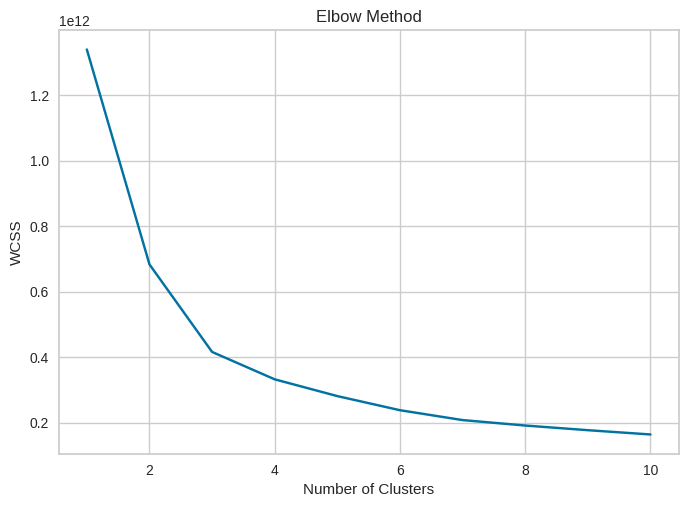

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


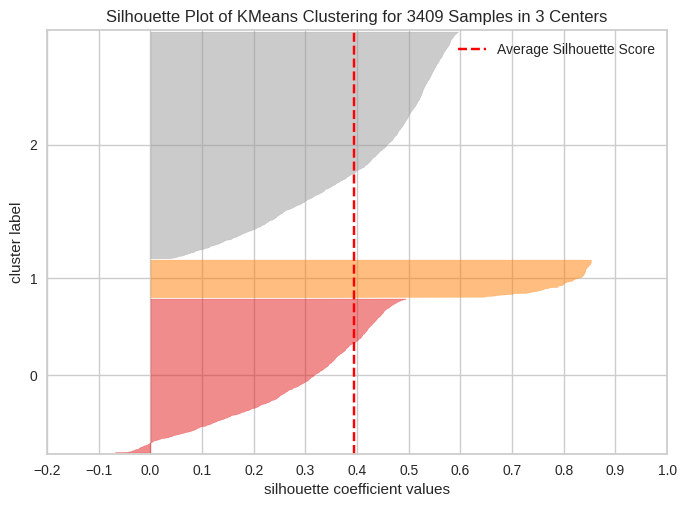

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 3409 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
cluster_data = df[["Gross Income", "Social Welfare","Short Distance","Long Distance"]]
cluster_data = cluster_data.replace("..", np.nan)
averages = cluster_data.mean()
cluster_data = cluster_data.fillna(averages)
# Determine the optimal number of clusters
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state=42)
    kmeans.fit(cluster_data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

# Fit the k-means clustering model
model = KMeans(n_clusters=3, init="k-means++", random_state=42).fit(cluster_data)

# Visualize the clusters
from yellowbrick.cluster import SilhouetteVisualizer
visualizer = SilhouetteVisualizer(model)
visualizer.fit(cluster_data)
visualizer.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


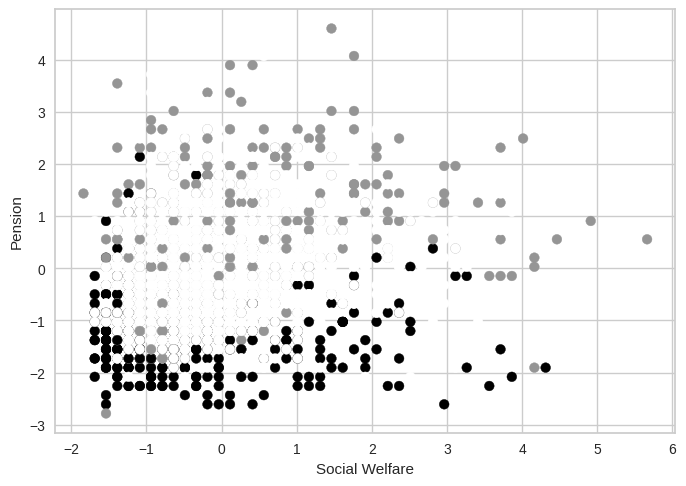

         Gross Income
Cluster              
0        42796.430486
1        38657.927215
2        57296.729730


In [ ]:
# Separate the independent variables from the dependent variable
X = df_new.drop(['Gross Income'], axis=1)
y = df_new['Gross Income']

# Normalize the independent variables
X = (X - X.mean()) / X.std()

# Cluster the EDs using k-means
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(X)

# Visualize the clustering results
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=clusters)
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.show()

# Analyze the clustering results
results = pd.DataFrame({'Cluster': clusters, 'Gross Income': y})
means = results.groupby('Cluster').mean()
print(means)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


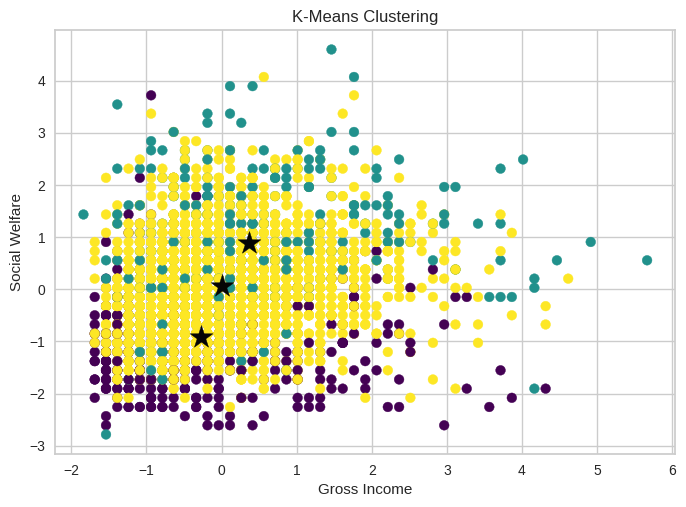

In [ ]:
# Load the data
saps_df = df_new

# Choose the variables to use for clustering
X = saps_df[['Social Welfare', 'Pension', 'Short Distance', 'Long Distance', 'Gross Income', 'Agriculture, Forestry and Fishing (A) (%)',
             'Construction (F) (%)', 'Financial, Real Estate, Administrative and Services (K,L,N,S) (%)', 
             'ICT, Scientific and Recreation (J,M,R) (%)', 'Industry (B,C,D,E) (%)', 'Public Service, Education and Health (O,P,Q) (%)',
             'Wholesale, Transport and Accomodation (G,H,I) (%)']].values

# Scale the variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Choose the number of clusters
n_clusters = 3

# Create the K-Means model and fit the data
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_scaled)

# Get the cluster assignments and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Plot the clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300, c='#050505')
plt.title('K-Means Clustering')
plt.xlabel('Gross Income')
plt.ylabel('Social Welfare')
plt.show()

# Regression

In [ ]:
train = data_news[:800]
test = data_news[800:1000]

In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42).fit(train.drop("Gross Income", axis=1), train["Gross Income"])

# Make predictions on the testing set
predictions = model.predict(test.drop("Gross Income", axis=1))

# Calculate the mean squared error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test["Gross Income"], predictions)

# Print out the MSE
print("Random forest MSE:", mse)

Random forest MSE: 2479230.616934


In [ ]:
X = data_news.drop('Gross Income', axis=1)  # independent variables
y = data_news['Gross Income']  # dependent variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=20)

# Fit linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on test set
y_pred = model.predict(X_test)

# Calculate metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f'R-squared: {r2:.3f}')
print(f'Mean absolute error: {mae:.2f}')
print(f'Root mean squared error: {rmse:.2f}')


R-squared: -970.570
Mean absolute error: 32354.02
Root mean squared error: 353860.88


In [ ]:
X = data_news.drop('Gross Income', axis=1)  # independent variables
y = data_news['Gross Income']  # dependent variable

# Train linear regression model
model = LinearRegression()
model.fit(X, y)

# Get feature coefficients and sort them in descending order
coef = pd.DataFrame({'feature': X.columns, 'coef': model.coef_}).sort_values('coef', ascending=False)

print(coef)

          feature        coef
460    T8_1_LAHFM  645.513470
469    T8_1_LAHFF  592.274797
289      T4_5ADUF  582.875967
533     T10_1_16M  553.211556
288      T4_5ADOF  504.282617
..            ...         ...
544     T10_1_17F -450.893076
250  T4_3FOPMCU15 -489.465621
553     T10_1_16T -510.870212
315   T5_1OPFCO_H -613.933865
478    T8_1_LAHFT -754.701302

[799 rows x 2 columns]


In [ ]:
X = sm.add_constant(X) # add a constant to the independent variables
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [ ]:
print(vif)

     VIF Factor   features
0     11.331449      const
1           inf  T1_1AGE0M
2           inf  T1_1AGE1M
3           inf  T1_1AGE2M
4           inf  T1_1AGE3M
..          ...        ...
795   20.056300    T15_3_B
796   16.558745  T15_3_OTH
797  217.308268    T15_3_N
798  256.400283   T15_3_NS
799         inf    T15_3_T

[800 rows x 2 columns]


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
model = sm.OLS(y, X_scaled).fit()

# get the coefficients
coefficients = pd.DataFrame({'feature': X.columns, 'coefficient': model.params})

# print the coefficients
print(coefficients)

         feature   coefficient
const      const -1.635327e-08
x1     T1_1AGE0M -6.745906e+02
x2     T1_1AGE1M -1.356690e+02
x3     T1_1AGE2M -2.069154e+03
x4     T1_1AGE3M -5.772813e+02
...          ...           ...
x795     T15_3_B  3.026457e+02
x796   T15_3_OTH  4.389191e+02
x797     T15_3_N  1.572026e+03
x798    T15_3_NS -5.321696e+03
x799     T15_3_T -6.096449e+03

[800 rows x 2 columns]


In [ ]:
model = sm.OLS(y, X).fit()
p_values = model.summary2().tables[1]['P>|t|']
print(p_values)

const        0.000000
T1_1AGE0M    0.825530
T1_1AGE1M    0.814402
T1_1AGE2M    0.131266
T1_1AGE3M    0.458032
               ...   
T15_3_B      0.577834
T15_3_OTH    0.374390
T15_3_N      0.379826
T15_3_NS     0.006228
T15_3_T      0.067892
Name: P>|t|, Length: 800, dtype: float64


In [ ]:
results = pd.DataFrame({'feature': X.columns, 'coefficient': model.params, 'p-value': model.pvalues})
results.sort_values('coefficient', ascending=False, inplace=True)

print(results)

         feature   coefficient   p-value
x290    T4_5ADUF  70195.021332  0.942299
x470  T8_1_LAHFF  59571.946234  0.968876
x206    T4_1_3PF  40184.909418  0.962953
x289    T4_5ADOF  37990.256165  0.949909
x555   T10_1_17T  37371.247014  0.872409
...          ...           ...       ...
x573  T10_3_ENGM -37066.393821  0.721279
x229  T4_2_1CO15 -39517.248396  0.936060
x234  T4_2_TCO15 -42063.978059  0.975474
x554   T10_1_16T -52472.889685  0.969182
x479  T8_1_LAHFT -80596.092711  0.960467

[800 rows x 3 columns]


# Classification

In [ ]:
# Define income categories and bin the data
income_bins = [0, 20000, 40000, 60000, 80000, 100000, 120000, 140000, 160000, 180000, 200000, 500000]
income_labels = ['<20k', '20k-40k', '40k-60k', '60k-80k', '80k-100k', '100k-120k', '120k-140k', '140k-160k', '160k-180k', '180k-200k', '>200k']
df_new['Gross Income'] = pd.cut(df_new['Gross Income'], bins=income_bins, labels=income_labels)

# Print the number of observations in each income category
print(df_new['Gross Income'].value_counts())


40k-60k      1840
20k-40k      1251
60k-80k       280
80k-100k       23
<20k           10
100k-120k       0
120k-140k       0
140k-160k       0
160k-180k       0
180k-200k       0
>200k           0
Name: Gross Income, dtype: int64


In [ ]:
# Set target variable
target_variable = "Gross Income"

# Define income ranges for classification
income_ranges = [(0, 20000), (20000, 40000), (40000, 60000), (60000, 80000), (80000, 100000), (100000, 120000), (120000, 140000), (140000, 160000), (160000, 180000), (180000, 200000), (200000, float("inf"))]

# Add classification target column to data
df_new["Income Range"] = pd.cut(df_new[target_variable], bins=[r[0] for r in income_ranges] + [income_ranges[-1][-1]], labels=[i for i in range(len(income_ranges))])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_new.drop(["Gross Income", "Income Range"], axis=1), df_new["Income Range"], test_size=0.4, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the K-NN classifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

# Predict the test set results
y_pred = classifier.predict(X_test)

# Evaluate the model
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("Accuracy:", accuracy)


Confusion Matrix:
 [[  0   3   2   0   0   0]
 [  0 251 234   2   0   0]
 [  0 169 556  20   0   0]
 [  0   4  19  95   0   0]
 [  0   0   8   0   0   0]
 [  0   0   1   0   0   0]]
Accuracy: 0.6612903225806451


In [ ]:
# Preprocess the data
df_new = df_new[['Gross Income', 'Social Welfare', 'Pension', 'Short Distance', 'Long Distance',
         'Agriculture, Forestry and Fishing (A) (%)', 'Construction (F) (%)', 
         'Financial, Real Estate, Administrative and Services (K,L,N,S) (%)', 
         'ICT, Scientific and Recreation (J,M,R) (%)', 'Industry (B,C,D,E) (%)', 
         'Public Service, Education and Health (O,P,Q) (%)', 'Wholesale, Transport and Accomodation (G,H,I) (%)']]
df_new['Income Class'] = (df_new['Gross Income'] >= 40000).astype(int)
df_new.dropna(inplace=True)

# Split the data into train and test sets
target_variable = 'Income Class'
X = df_new.drop(columns=['Gross Income', 'Income Class'])
y = df_new[target_variable]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)
print('Confusion Matrix:', confusion)


Accuracy: 0.6964809384164223
Precision: 0.7582644628099173
Recall: 0.8030634573304157
F1 Score: 0.7800212539851221
Confusion Matrix: [[108 117]
 [ 90 367]]
